# 1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
!pip list

In [1]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

In [ ]:
gpus

# Clean the images

In [2]:
import cv2
import imghdr

In [3]:
data_dir = 'Data' 

In [4]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [5]:
os.listdir(data_dir)

['Bacterial_Spot',
 'Down_Mildew',
 'Early_blight',
 'Heathly_Leaves',
 'Leave_Fall']

In [ ]:
#for image_class in os.listdir(data_dir):
  #  for image in os.listdir(os.path.join(data_dir, image_class)):
     #   print(image)

In [6]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#data = tf.keras.utils.image_dataset_from_directory??

In [8]:
data = tf.keras.utils.image_dataset_from_directory('Data', batch_size=64, image_size=(256, 256))

Found 10335 files belonging to 5 classes.


In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
data_iterator

In [11]:
#Get another batch
#0 Bacterial_Spot
#1 Down_Mildew
#2 Early_blight
#3 Heathly_Leaves
#4 Leave_Fall

batch = data_iterator.next()

In [12]:
#
batch[1]

array([4, 3, 3, 3, 1, 1, 4, 0, 0, 2, 4, 0, 0, 1, 3, 0, 1, 0, 4, 4, 1, 1,
       4, 4, 4, 2, 1, 3, 3, 4, 1, 4, 1, 4, 2, 0, 4, 3, 2, 0, 1, 0, 3, 4,
       3, 0, 1, 1, 2, 2, 1, 4, 3, 3, 0, 0, 3, 1, 3, 4, 3, 2, 2, 4])

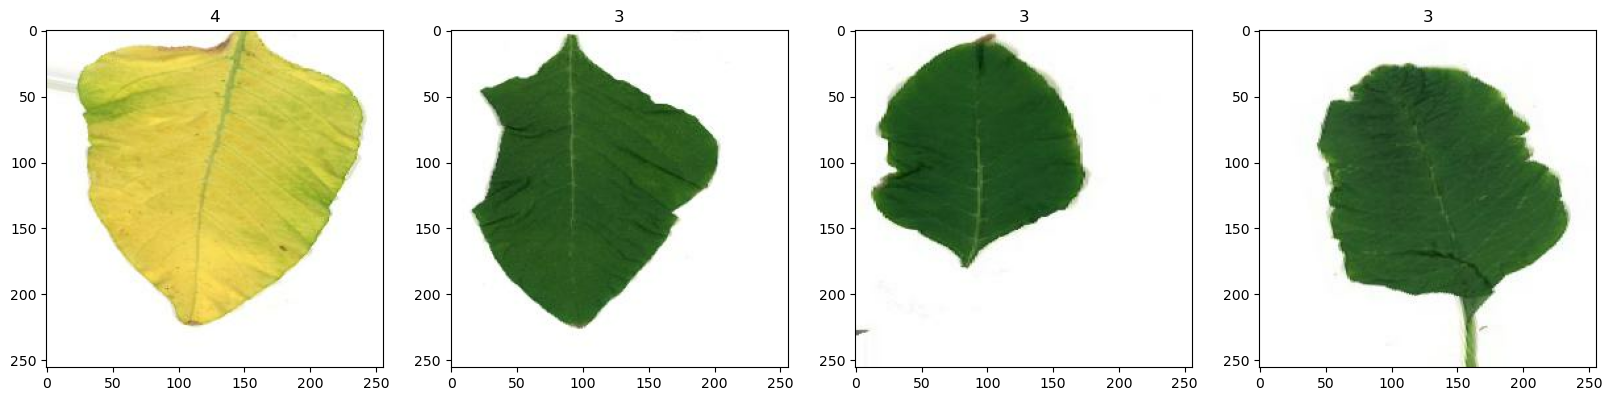

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
scaled_iterator = data.as_numpy_iterator()

In [16]:
batch = scaled_iterator.next()

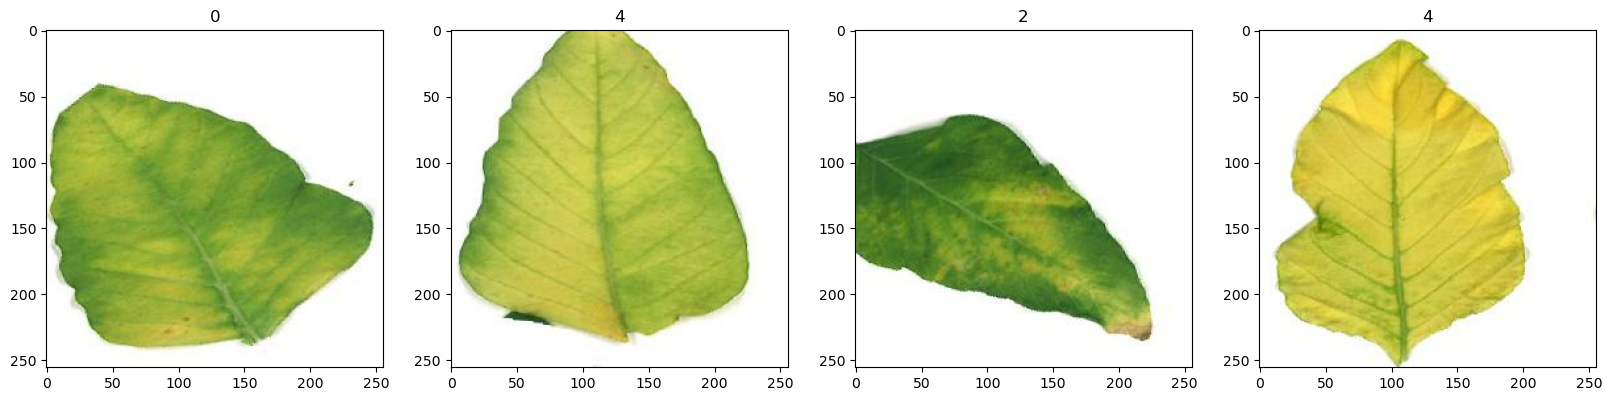

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 5. Split Data

In [18]:
len(data)

162

In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [20]:
train_size
#The lenght of the training batch

113

In [21]:
val_size
#The lenght of the validation batch

33

In [22]:
test_size
#The lenght of the test batch

16

In [23]:
train_size+val_size+test_size#
#The sum of all batches

162

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [25]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [31]:
logdir='Logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
hist = model.fit(train, batch_size = 128, epochs=10, 
                 validation_data=val, 
                 validation_split = 0.2, 
                 callbacks=[tensorboard_callback])

Epoch 1/10
113/113 [==============================] - 27s 159ms/step - loss: -33699264.0000 - accuracy: 0.2038 - val_loss: -256526656.0000 - val_accuracy: 0.2022
Epoch 2/10
113/113 [==============================] - 18s 158ms/step - loss: -6634571264.0000 - accuracy: 0.2035 - val_loss: -24342593536.0000 - val_accuracy: 0.1974
Epoch 3/10
113/113 [==============================] - 18s 156ms/step - loss: -116063379456.0000 - accuracy: 0.2022 - val_loss: -272709189632.0000 - val_accuracy: 0.1984
Epoch 4/10
113/113 [==============================] - 18s 156ms/step - loss: -764398665728.0000 - accuracy: 0.2048 - val_loss: -1492504674304.0000 - val_accuracy: 0.1955
Epoch 5/10
113/113 [==============================] - 18s 158ms/step - loss: -3026535055360.0000 - accuracy: 0.2034 - val_loss: -4966765297664.0000 - val_accuracy: 0.1965
Epoch 6/10
113/113 [==============================] - 18s 156ms/step - loss: -8780119539712.0000 - accuracy: 0.2022 - val_loss: -12995503587328.0000 - val_accurac

# 8. Plot Performance

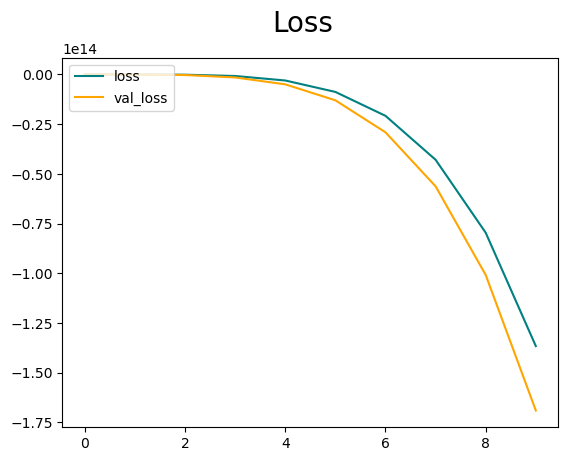

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

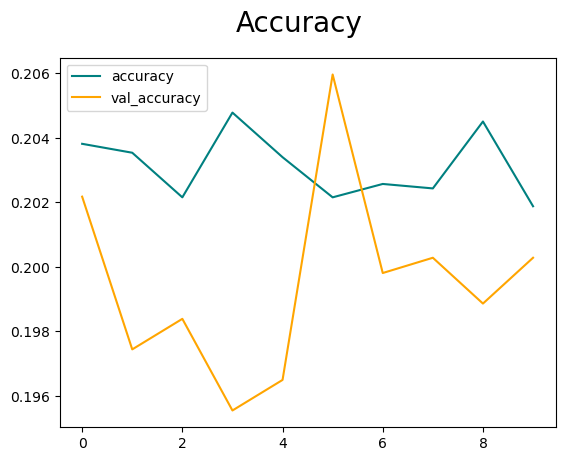

In [35]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [36]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [37]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [38]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 354ms/step


In [39]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.8173562, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.20887992, shape=(), dtype=float32)


In [40]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.8173562288284302, Recall:1.0, Accuracy:0.20887991786003113


# 10. Test

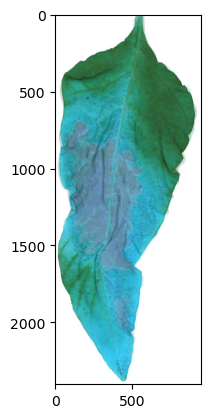

In [41]:
img = cv2.imread('.Early_blight.jpg')
plt.imshow(img)
plt.show()

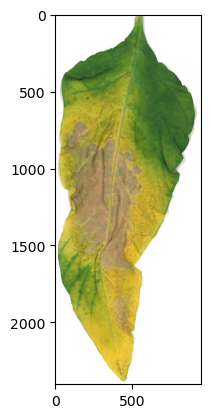

In [42]:
#Converting from Blue Green Red (BGR) to Red Green Blue (RGB)
img = cv2.imread('.Early_blight.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

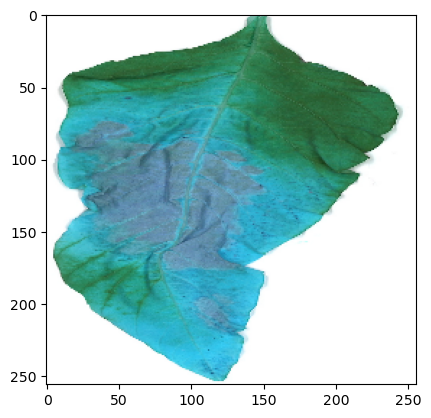

In [43]:
#Resize the image
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [44]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [45]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 123ms/step


In [46]:
yhat

array([[1.]], dtype=float32)

In [47]:
if yhat < 0.5: 
    print(f'Predicted class is Healthy Leave')
else:
    print(f'Predicted class is Infected Leave')

Predicted class is Infected Leave


# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('models','imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))